# 1. Optimization problem example

Let a circular cylindrical can has the height h and radius r.

The volume of the can is
$$ V = \pi r^2 h $$
Then, 
$$ h = \frac{V}{\pi r^2} $$

The surface area of the can is 
$$ S = 2 \pi rh + 2 \pi r^2 $$

We want to minimize the surface area, the objective functions is

$$ \min_{h,r ∈ ℝ} 2 \pi rh + 2 \pi r^2  $$ 

As $ h = \frac{V}{\pi r^2} , $

\begin{aligned}
S &= 2 \pi r \frac{V}{\pi r^2} + 2 \pi r^2 \\
&= \frac{2V}{r} + 2 \pi r^2
\end{aligned}

Then,
\begin{aligned}
\frac{\partial S}{\partial r} &= \frac{-2V}{r^2} + 4 \pi r \\
0 &= \frac{-2V}{r^2} + 4 \pi r 
\end{aligned}

We will get, 
\begin{aligned}
r^{*} &=  \sqrt[3]{\frac{V}{2 \pi}} \\
h^{*} &=  \sqrt[3]{\frac{4V}{\pi}} 
\end{aligned}

Check if second order optimality condition is greater than 0,
\begin{aligned}
\frac{\partial^2 S}{\partial^2 r} = \frac{4V}{r^3} + 4 \pi > 0 \quad \text{; since r, V, }\pi > 0 
\end{aligned}

So that, $r^{*} = \sqrt[3]{\frac{V}{2 \pi}} $ and $h^{*} = \sqrt[3]{\frac{4V}{\pi}}$






# 2. Optimally conditions

From the optimality conditions,
$$ \nabla f(x^{*}) = 0 \quad (f'(x^{*}) = 0) $$
$$ \nabla^2 f(x^{*}) \succ 0 \quad (f''(x^{*}) > 0) $$

We have function
$$ f(x_1,x_2)  = \frac{3}{2}(x_1^2 + x_2^2) + (1+a)x_1 x_2 - (x_1 + x_2) + b ; \quad a, b ∈ ℝ $$

First order optimality condition,
$$ \frac{\partial f(x_1, x_2)}{\partial x_1} = 3x_1 + (1+a)x_2 -1 $$
$$ \frac{\partial f(x_1, x_2)}{\partial x_2} = 3x_2 + (1+a)x_1 -1 $$

$$ 
\nabla f(x^{*}) = 
\begin{bmatrix}
3x_1 + (1+a)x_2 -1 \\
3x_2 + (1+a)x_1 -1 
\end{bmatrix} = 0
$$

We can derive,
$$
\begin{bmatrix}
3 & 1+a \\
1+a & 3
\end{bmatrix} 
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = 
\begin{bmatrix} 1 \\ 1 \end{bmatrix}
$$

Second order optimality condition,
$$ \nabla^2 f(x^{*}) = 
\begin{bmatrix}
3 & 1+a \\
1+a & 3
\end{bmatrix} \succ 0 $$

We know that $\nabla^2 f(x^{*})$ is positive definite matrix, then the determinant of it is positive.
$$
\begin{aligned}
\begin{vmatrix}
3 & 1+a \\
1+a & 3
\end{vmatrix} &> 0 \\
9 - (1+a)^2 &> 0 \\
(1+a)^2 &< 9 \\
-3 < 1+a &< 3 \\
\end{aligned}
$$

So that, $$ -4 < a < 2 \quad \text{and} \quad b ∈ ℝ $$

# 3. Nelder–Mead method

Mishra's Bird function
$$ f(x,y) = sin(y) e^{(1-cos(x))^2} + cos(x) e^{(1-sin(y))^2} +(x-y)^2 $$
subjected to, $$ \quad (x+5)^2 + (y+5)^2 < 25 $$

1. To illustrate the behavior of the method, plot simplex (triangle) for every iterations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [2]:
# define function for illustration
def fn(point):
    x, y = point
    return np.sin(y)*np.exp((1 - np.cos(x))**2) + np.cos(x)*np.exp((1 - np.sin(y))**2) + (x - y)**2

In [3]:
# illustrate function 
def plot_mishra_fn():
    # Due to the constraint function, the central point of constrainr is (-5, -5) where radius = 5.
    x = np.linspace(-10, 0, 100)
    y = np.linspace(-10, 0, 100)
    x, y = np.meshgrid(x, y)

    # z --> value of function where (x, y) is input
    vec = np.vectorize(fn, signature='(2)->()') 
    z = vec(np.stack((x, y), axis = -1))
                                  
    fig, ax = plt.subplots(figsize = (8, 8)) 
    plt.title("Mishra's Bird function")  
    plt.xlabel('x')
    plt.ylabel('y')

    # illustrate function
    plt.contourf(x, y, z)

    # illustrate constraint
    ax.add_patch(Circle((-5, -5), 5, color = 'white', alpha = 0.5)) 

In [4]:
# define function with constraint
def mishra_fn(point): 
    x, y = point
    constraint_val = (x + 5)**2 + (y + 5)**2 
    if constraint_val < 25:
        fn_value = fn(point)
    else:
        fn_value = 10**18     # assign very large value to punish function!
    return fn_value

In [5]:
def nelder_mead(mishra_fn, init_1, max_iter = 1000, tolerance = 1e-10, alpha = 1, beta = 0.5, gamma = 2, delta = 0.5):
    init_2 = (init_1[0] + 2, init_1[1] - 1)
    init_3 = (init_1[0] - 0.5, init_1[1] + 1)

    iter_i = 0
    tol_i = 1.0

    # plot function as background
    plot_mishra_fn()

    while (iter_i < max_iter) and (tol_i > tolerance):
        iter_i += 1
        fn_val_dict = {mishra_fn(init_1) : init_1, 
                       mishra_fn(init_2) : init_2, 
                       mishra_fn(init_3) : init_3}  
        sorted_val = sorted(fn_val_dict.items(), key = lambda x: x[0])
        xl = np.asarray(sorted_val[0][1])
        xg = np.asarray(sorted_val[1][1])
        xh = np.asarray(sorted_val[2][1])

        # plot simplex (triagle)
        plot_x = [xl[0], xg[0], xh[0], xl[0]]
        plot_y = [xl[1], xg[1], xh[1], xl[1]]
        plt.plot(plot_x, plot_y, "-") 

        # center of gravity
        xc = (xg + xl)/2
        #reflextion
        xr = xc + alpha*(xc - xh) 

        # 4a
        if mishra_fn(xr) < mishra_fn(xl):
            # expansion
            xe = xc + gamma*(xr - xc)
            if mishra_fn(xe) < mishra_fn(xl):
                xh = xe
            else:
                xh = xr 
        # 4b
        if (mishra_fn(xl) < mishra_fn(xr) < mishra_fn(xg)):
            xh = xr
        # 4c + 4d
        if ((mishra_fn(xh) > mishra_fn(xr) > mishra_fn(xg))) | (mishra_fn(xr) > mishra_fn(xh)): 
            if (mishra_fn(xh) > mishra_fn(xr) > mishra_fn(xg)):
                xh = xr
            # contraction --> reflect xr is worse than xg
            xs = xc + beta*(xh - xc)  
            if mishra_fn(xs) < mishra_fn(xh): 
                xh = xs  
            else:   # shrinkage
                xg = xl + delta*(xg - xl) 
                xh = xl + delta*(xh - xl)

        # Check convergence 
        vect_fn = np.vectorize(mishra_fn, signature='(2)->()')
        val_best = vect_fn(xl)
        val_genl = vect_fn(xg)
        tol_i = abs(val_best - val_genl) 

        # update points
        init_1 = xl
        init_2 = xg
        init_3 = xh

    return mishra_fn(init_1), init_1, iter_i

x0 = [-3,-3], x* = [-3.13024694 -1.5821416 ], and optimal value = -106.76453674921585


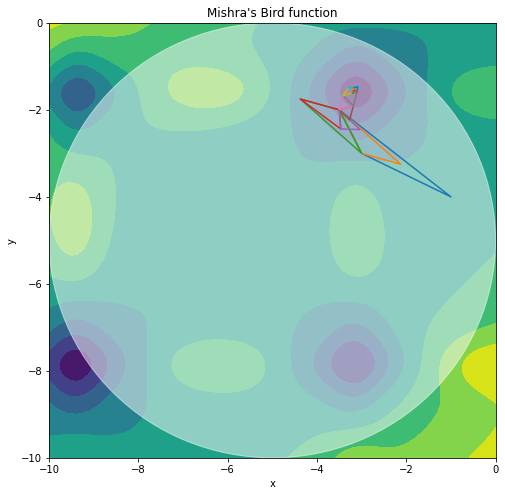

In [ ]:
init_1 = (-3,-3) 
val_xl, xl, iter_i = nelder_mead(mishra_fn, init_1)
print(f'x0 = [-3,-3], x* = {xl}, and optimal value = {val_xl}')

2. Demonstrate that the algorithm may converge to different points depending on the starting
point. Report explicitly two distinct starting points $x^{0}$ and the corresponding $x^{∗}$.

x0 = [-8,-4], x* = [-3.05119324 -7.62225723], and optimal value = -80.28092871434063
x0 = [-6,-3], x* = [-5.03466797 -4.64794922], and optimal value = 2.0579482103322873


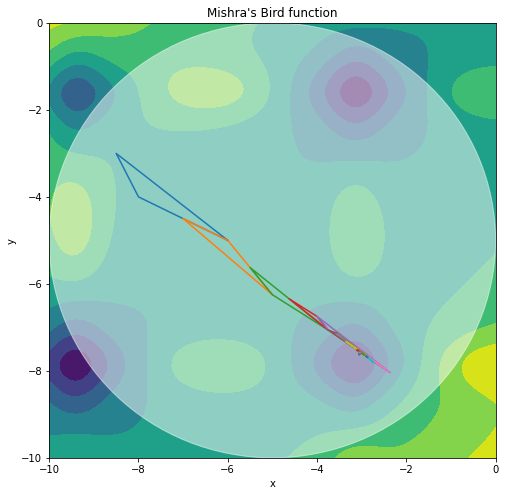

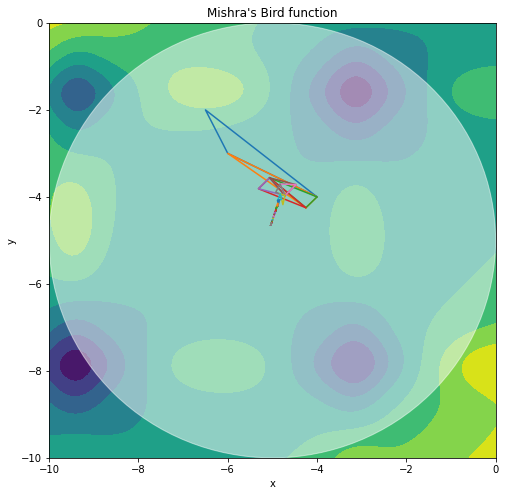

In [ ]:
point_a = (-8,-4) 
val_xl_a, xl_a, i_a = nelder_mead(mishra_fn, point_a)
print(f'x0 = [-8,-4], x* = {xl_a}, and optimal value = {val_xl_a}')

point_b = (-6,-3) 
val_xl_b, xl_b, i_b = nelder_mead(mishra_fn, point_b)
print(f'x0 = [-6,-3], x* = {xl_b}, and optimal value = {val_xl_b}')

3. Examine the behavior of the method for various parameters α, β, and γ. For one chosen $x^{0}$
show that the method may converge to different points. Report parameter values and $x^{∗}$.

Default case: alpha = 1, beta = 0.5, gamma = 2, x* = [-3.13024694 -1.5821416 ]
Change alpha: alpha = 10, beta = 0.5, gamma = 2, x* = [-3.57271375 -1.90385189]
Change beta: alpha = 1, beta = 10, gamma = 2, x* = [-3.13024789 -1.5821416 ]
Change gamma: alpha = 1, beta = 0.5, gamma = 10, x* = [-3.13024585 -1.5821429 ]
Change alpha, beta, gamma: alpha = 8, beta = 6, gamma = 4, x* = [-3.13024216 -1.58214368]


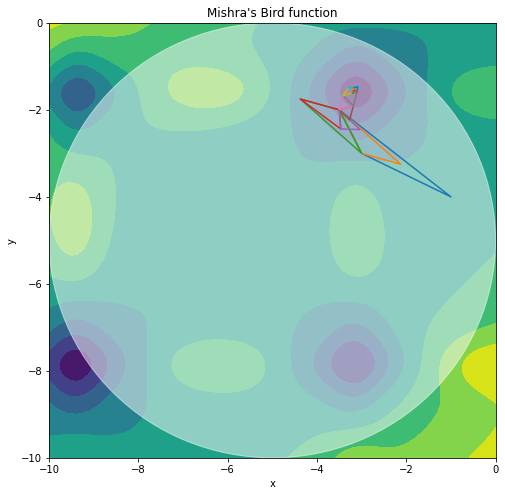

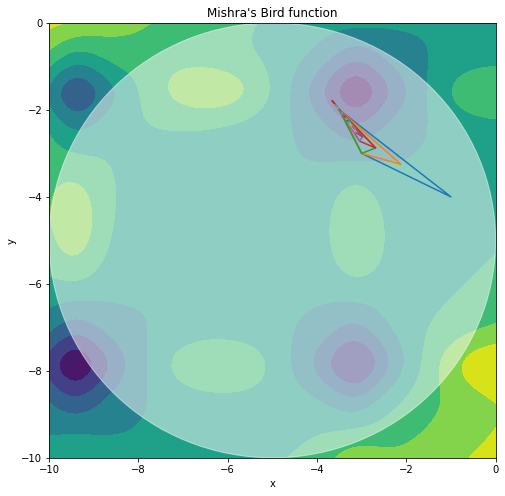

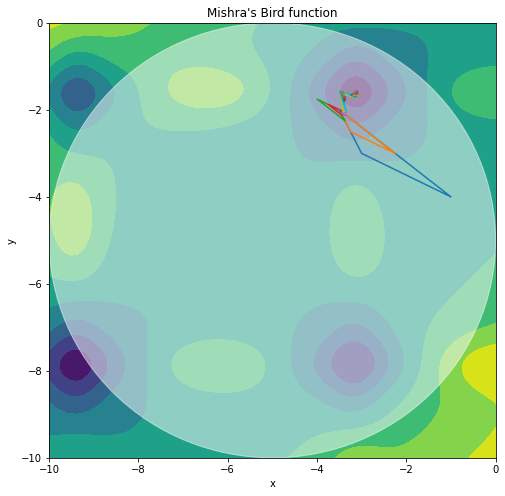

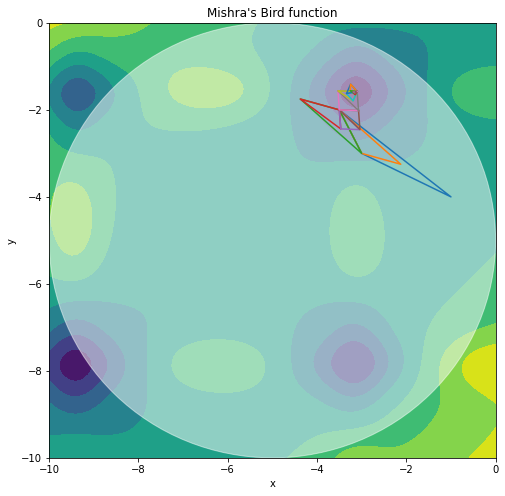

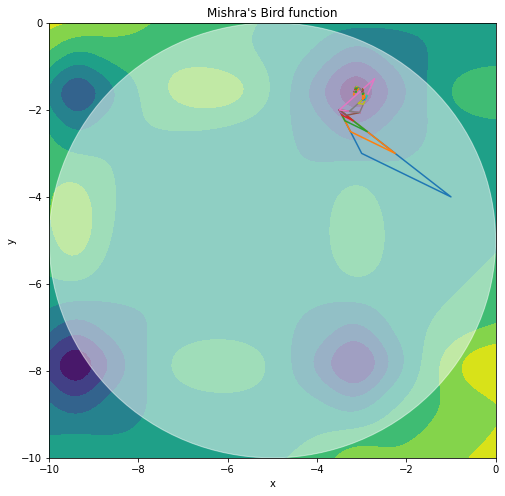

In [ ]:
# Set x0
init_1 = (-3,-3) 

# Default
val_xl_df, xl_df, i_df = nelder_mead(mishra_fn, init_1, alpha = 1, beta = 0.5, gamma = 2)

# Change alpha
val_xl_a, xl_a, i_a = nelder_mead(mishra_fn, init_1, alpha = 10, beta = 0.5, gamma = 2)

# Change beta
val_xl_b, xl_b, i_b = nelder_mead(mishra_fn, init_1, alpha = 1, beta = 10, gamma = 2)

# Change gamma
val_xl_g, xl_g, i_g = nelder_mead(mishra_fn, init_1, alpha = 1, beta = 0.5, gamma = 10)

# Change alpha, beta, gamma
val_xl_all, xl_all, i_all = nelder_mead(mishra_fn, init_1, alpha = 8, beta = 6, gamma = 4)

print(f'Default case: alpha = 1, beta = 0.5, gamma = 2, x* = {xl_df}')
print(f'Change alpha: alpha = 10, beta = 0.5, gamma = 2, x* = {xl_a}')
print(f'Change beta: alpha = 1, beta = 10, gamma = 2, x* = {xl_b}')
print(f'Change gamma: alpha = 1, beta = 0.5, gamma = 10, x* = {xl_g}')
print(f'Change alpha, beta, gamma: alpha = 8, beta = 6, gamma = 4, x* = {xl_all}')

# 4. Coordinate descent

Implement coordinate descent for $x^0$ and $f$ from Task 3. Compare the number of function evaluations (Oracle calls) for Nelder–Mead algorithm and coordinate descent. Report parameters of the algorithm. Make a conclusion

In [ ]:
def cd(x, max_iter = 1000, tolerance = 1e-10, gamma = 0.5, alpha = 1): 
    x = np.asarray(x)
    iter_i = 0
    tol_i = 1.0
    list_x = [] 

    while (iter_i < max_iter) and (tol_i > tolerance):
        iter_i += 1

        # odd round --> update x
        if (iter_i % 2) == 1:
            h_i = np.array([1, 0]) 

        # even round --> update y
        if (iter_i % 2) == 0:
            h_i = np.array([0, 1])

        sk = (alpha/2) * (mishra_fn(x + alpha*h_i) - mishra_fn(x - alpha*h_i))*h_i

        # step size
        gamma_k = gamma/iter_i

        x_prev = x
        x = x - gamma_k*sk  

        vec_fn = np.vectorize(mishra_fn, signature='(2)->()')
        tol_i = np.abs(vec_fn(x_prev) - vec_fn(x))

        list_x.append(x) 
    
    return list_x, iter_i

Nelder Mead
x0 = [-3,-5], x* = [-3.1302476  -1.58214171], optimal value = -106.76453674914767, oracle calls = 71
Coordinate Decent
x0 = [-3,-5], x* = [-3.10110158 -1.6112874 ], optimal value = -106.53019153599062, oracle calls = 125


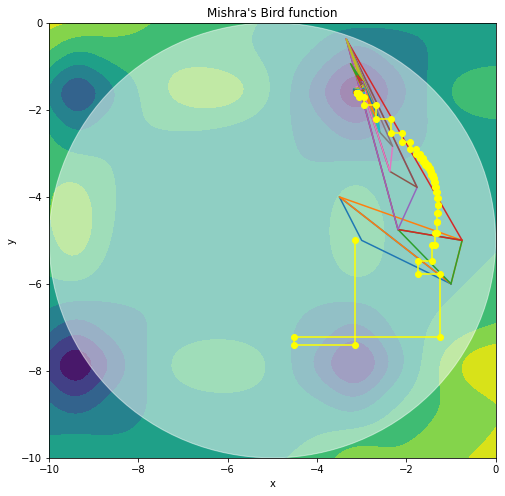

In [ ]:
x_a = (-3,-5)
val_xl, xl, iter_i = nelder_mead(mishra_fn, x_a, alpha = 2, beta = 0.5, gamma = 2)
print(f'Nelder Mead\nx0 = [-3,-5], x* = {xl}, optimal value = {val_xl}, oracle calls = {iter_i}')

list_x_a, calls_a = cd(x_a)
print(f'Coordinate Decent\nx0 = [-3,-5], x* = {list_x_a[-1]}, optimal value = {mishra_fn(list_x_a[-1])}, oracle calls = {calls_a}')
list_x_a = np.array(list_x_a)
plt.plot(list_x_a[:,0], list_x_a[:,1], 'o-', color = 'yellow');

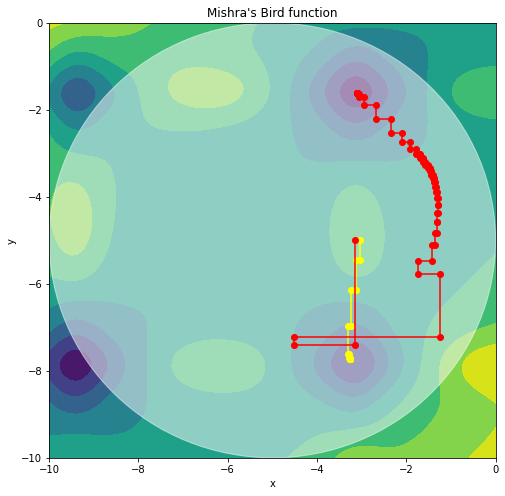

In [ ]:
plot_mishra_fn()
x_a = (-3,-5)

list_x_a, calls_a = cd(x_a, gamma = 0.1, alpha = 1)
list_x_a = np.array(list_x_a)
plt.plot(list_x_a[:,0], list_x_a[:,1], 'o-', color = 'yellow')

list_x_b, calls_b = cd(x_a, gamma = 0.5, alpha = 1)
list_x_b = np.array(list_x_b)
plt.plot(list_x_b[:,0], list_x_b[:,1], 'o-', color = 'red');

Comparing number of function evaluations, Nelder Mead is required the oracle calls less than Coordinate Decent Method while the functions lead to almost the same point. Moreover, the parameters (alpha and gamma) are important for Coordinate Decent Method. As you can see from the above illustration (red vs yellow points), the different value in gamma leads to the different converged point.